In [67]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import keras_metrics
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [68]:
data = pd.read_csv(r"A_Z Handwritten Data.csv").astype('float32')

print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

In [69]:
X = data.drop('0',axis = 1)
y = data['0']

In [70]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [71]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

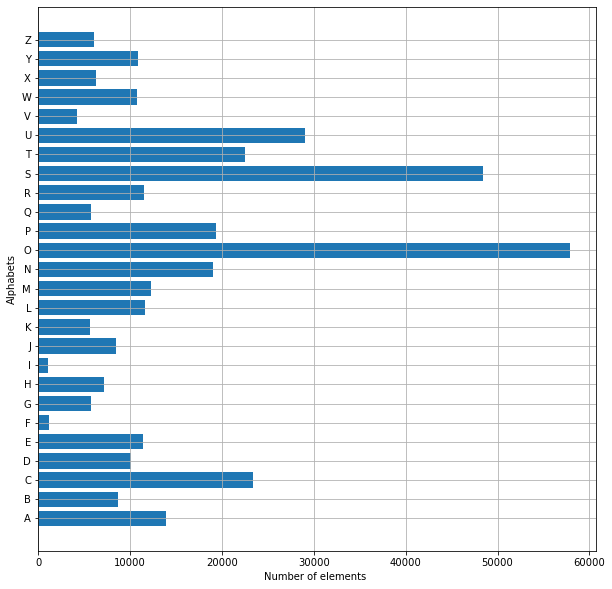

In [72]:

y_int = np.int0(y)

count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

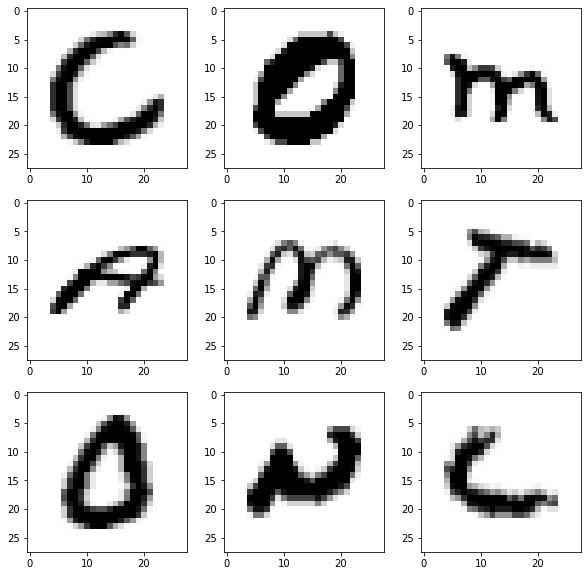

In [73]:
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [145]:

train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of test data: ", test_X.shape)


New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1)


In [75]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [76]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [77]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=[keras.metrics.Precision(), keras.metrics.Recall(),keras.metrics.TruePositives(),keras.metrics.FalsePositives(),keras.metrics.TrueNegatives(),keras.metrics.FalseNegatives(),'accuracy'])

history = model.fit(train_X, train_yOHE, epochs=10,  validation_data = (test_X,test_yOHE))

Epoch 1/10
9312/9312 [==============================] - 251s 24ms/step - loss: 0.3699 - precision_2: 0.9442 - recall_1: 0.8898 - true_positives_1: 138610.0831 - false_positives_1: 5743.3645 - true_negatives_1: 3719856.4207 - false_negatives_1: 10413.9083 - accuracy: 0.9105 - val_loss: 0.0861 - val_precision_2: 0.9822 - val_recall_1: 0.9730 - val_true_positives_1: 72481.0000 - val_false_positives_1: 1315.0000 - val_true_negatives_1: 1860935.0000 - val_false_negatives_1: 2009.0000 - val_accuracy: 0.9772
Epoch 2/10
9312/9312 [==============================] - 222s 24ms/step - loss: 0.0722 - precision_2: 0.9830 - recall_1: 0.9775 - true_positives_1: 145683.4066 - false_positives_1: 2517.5358 - true_negatives_1: 3723082.2494 - false_negatives_1: 3340.5848 - accuracy: 0.9798 - val_loss: 0.0631 - val_precision_2: 0.9860 - val_recall_1: 0.9815 - val_true_positives_1: 73109.0000 - val_false_positives_1: 1038.0000 - val_true_negatives_1: 1861212.0000 - val_false_negatives_1: 1381.0000 - val_accu

In [78]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)              

In [144]:
'''print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])
print("The validation precision is: ",history.history['val_precision_2'])
print("The training precision is: ",history.history['precision_2'])
print("The validation recall is: ",history.history['val_recall_1'])
print("The training recall is: ",history.history['recall_1'])
print("Number of True Positives: ",history.history['val_true_positives_1'])
print("Number of False Positives: ",history.history['val_false_positives_1'])
print("Number of True Negatives: ",history.history['val_true_negatives_1'])
print("Number of False Negatives: ",history.history['val_false_negatives_1'])'''
epo=9
history_dict = history.history
#print(history_dict.keys())
accuracy = history_dict['accuracy']
print("Training Accuracy after",epo+1,"epochs is:",val_accuracy[epo])
loss=history_dict['loss']
print("Training Loss after",epo+1,"epochs is:",val_loss[epo])
val_accuracy = history_dict['val_accuracy']
print("Testing Accuracy after",epo+1,"epochs is:",val_accuracy[epo])
val_loss=history_dict['val_loss']
print("Testing Loss after",epo+1,"epochs is:",val_loss[epo])
final_precision=history_dict['val_precision_2']
print("Precision after",epo+1,"epochs is:",final_precision[epo])
final_recall=history_dict['val_recall_1']
print("Recall after",epo+1,"epochs is:",final_recall[epo])
print("=> AFTER",epo+1,"EPOCHS <=")
tp=history_dict['val_true_positives_1']
print("True Positives: ",tp[epo])
tn=history_dict['val_true_negatives_1']
print("True Negatives: ",tn[epo])
fp=history_dict['val_false_positives_1']
print("False Positives: ",fp[epo])
fn=history_dict['val_false_negatives_1']
print("False Negatives: ",fn[epo])

Training Accuracy after 10 epochs is: 0.9858370423316956
Training Loss after 10 epochs is: 0.078903928399086
Testing Accuracy after 10 epochs is: 0.9858370423316956
Testing Loss after 10 epochs is: 0.078903928399086
Precision after 10 epochs is: 0.9880366921424866
Recall after 10 epochs is: 0.9845482707023621
=> AFTER 10 EPOCHS <=
True Positives:  73339.0
True Negatives:  1861362.0
False Positives:  888.0
False Negatives:  1151.0


In [109]:
confusion_matrix=[]
confusion_matrix.append(tp[epo])
confusion_matrix.append(tn[epo])
confusion_matrix.append(fp[epo])
confusion_matrix.append(fn[epo])

confusion_matrix_2d = np.reshape(confusion_matrix, (2, 2))

print("CONFUSION MATRIX")
print(confusion_matrix_2d)

CONFUSION MATRIX
[[7.333900e+04 1.861362e+06]
 [8.880000e+02 1.151000e+03]]


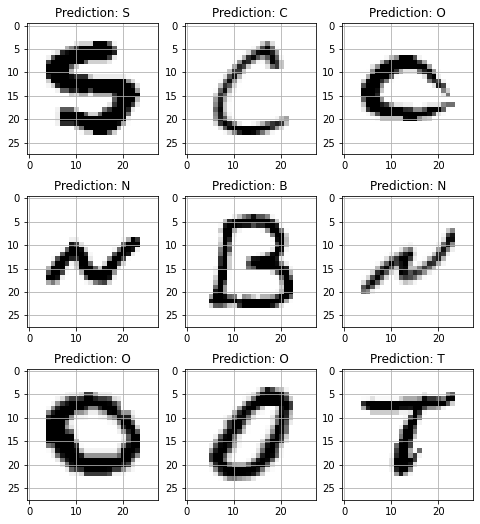

In [110]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [157]:
img = cv2.imread(r'img_q.png')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [158]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))
img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Given Handwritten Image", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('handwritten character recognition ', img)

In [159]:
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

KeyboardInterrupt: 